In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/home/viper/Downloads/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2

In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
import matplotlib.pyplot as plt

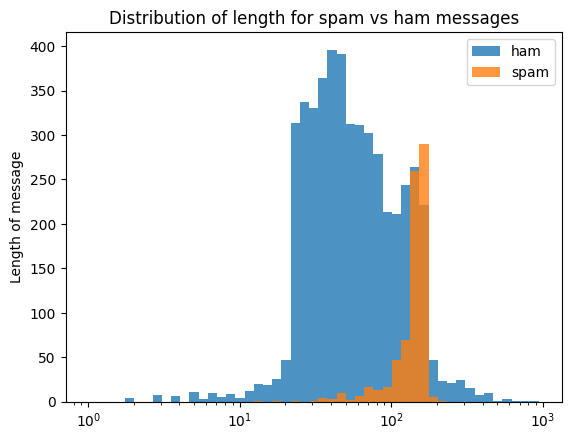

In [15]:
plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.title("Distribution of length for spam vs ham messages")
plt.ylabel("Length of message")
plt.show()

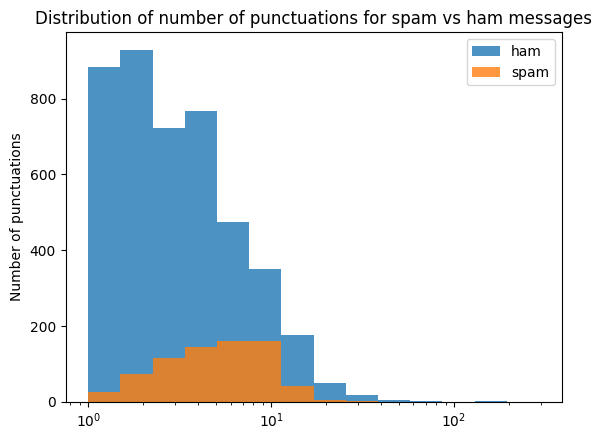

In [18]:
plt.xscale('log')
bins = 1.5**(np.arange(0, 15))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.title("Distribution of number of punctuations for spam vs ham messages")
plt.ylabel("Number of punctuations")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# X is feature data
X = df[['length', 'punct']]
# y label data
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

In [21]:
print(X_train.shape, X_test.shape)

(3900, 2) (1672, 2)


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_model = LogisticRegression()

In [24]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
predictions = lr_model.predict(X_test)

In [34]:
error = 0
for actual, predicted in zip(y_test, predictions):
    if actual != predicted:
        error += 1

In [35]:
from sklearn import metrics

In [36]:
lr_model.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [37]:
metrics.confusion_matrix(y_test, predictions)

array([[1390,   41],
       [ 240,    1]])

In [39]:
pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['Ham', 'Spam'], columns=['Ham', 'Spam'])

Ham  Spam
Ham   1390    41
Spam   240     1

In [41]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.85      0.97      0.91      1431
        spam       0.02      0.00      0.01       241

    accuracy                           0.83      1672
   macro avg       0.44      0.49      0.46      1672
weighted avg       0.73      0.83      0.78      1672



In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
nb_model = MultinomialNB()

In [44]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [46]:
predictions1 = nb_model.predict(X_test)

In [47]:
pd.DataFrame(metrics.confusion_matrix(y_test, predictions1), index=['Ham', 'Spam'], columns=['Ham', 'Spam'])

Ham  Spam
Ham   1427     4
Spam   241     0

In [48]:
print(metrics.classification_report(y_test, predictions1))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.92      1431
        spam       0.00      0.00      0.00       241

    accuracy                           0.85      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.73      0.85      0.79      1672



In [50]:
from sklearn.svm import SVC

In [51]:
svc = SVC(gamma='auto')

In [52]:
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [53]:
predictions2 = svc.predict(X_test)

In [54]:
print(metrics.classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         ham       0.91      0.95      0.93      1431
        spam       0.61      0.47      0.53       241

    accuracy                           0.88      1672
   macro avg       0.76      0.71      0.73      1672
weighted avg       0.87      0.88      0.87      1672

